# FindDefault - Prediction of Credit Card Fraud Capstone Project

### By :  Swati Acharya


## Problem Statement: 
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
**We have to build a classification model to predict whether a transaction is fraudulent or not.**



## Data Understanding :

The dataset gis given in .csv file

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Features (V1, V2, V3, up to V28, Time, Amount) are the INdependent variables. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents Target Variable, and it takes the value 1 in cases of fraud and 0 in others.

We will apply the following points:
    ▪	**Exploratory Data Analysis:** Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 
    ▪	**Data Cleaning:** This might include standardization, handling the missing values and outliers in the data. 
    ▪	**Dealing with Imbalanced data:** This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
    ▪	**Feature Engineering:** Create new features or transform the existing features for better performance of the ML Models. 
    ▪	**Model Selection:** Choose the most appropriate model that can be used for this project. 
    ▪	**Model Training:** Split the data into train & test sets and use the train set to estimate the best model parameters. 
    ▪	**Model Validation:** Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting. 
    ▪	**Model Deployment:** Model deployment is the process of making a trained machine learning model available for use in a production environment. 


### Import Libraries

In [7]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


ImportError: cannot import name 'parse_version' from partially initialized module 'sklearn.utils.fixes' (most likely due to a circular import) (C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\fixes.py)

In [1]:
!pip show scikit-learn      # Should show v1.0.2

import sklearn
print(sklearn.__version__)  # Should also show v1.0.2

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Acer\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: category-encoders, daal4py, imbalanced-learn, scikit-learn-intelex, scikit-optimize


ImportError: cannot import name 'parse_version' from partially initialized module 'sklearn.utils.fixes' (most likely due to a circular import) (C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\fixes.py)

### Load Dataset

In [8]:
#To read csv File from locally stored file
df_creditcard = pd.read_csv('creditcard.csv')
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check the Shape, Datatype, Summary

In [4]:
# Check the shape:
df_creditcard.shape

print('Number of rows in creditcard dataset :', df_creditcard.shape[0])
print('Number of columns in creditcard dataset  :', df_creditcard.shape[1])

Number of rows in creditcard dataset : 284807
Number of columns in creditcard dataset  : 31


In [4]:
# Check the Summary of the data:
df_creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#Check the data frame for the shape, datatypes,missing values etc

print("Check the dataset for the shape, datatypes,missing values etc")
print("************************************************************")
df_creditcard.info()

Check the dataset for the shape, datatypes,missing values etc
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V

In [13]:
#Check the unique values in target variables - fraud/Non_Fraud
df_creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
#Check proportion in target variable - class
fraud_nonfraud_percentage = df_creditcard.Class.value_counts(normalize=True)*100

print("Check proportion in target variable - class");
print("************************************************************")
print("Proportion of Non-Fraud data:",fraud_nonfraud_percentage[0]);
print("Proportion of Fraud data:",fraud_nonfraud_percentage[1]);

Check proportion in target variable - class
************************************************************
Proportion of Non-Fraud data: 99.82725143693798
Proportion of Fraud data: 0.1727485630620034


In [24]:
# Check the Missing Values
print("Check if there is any missing value in creditcard dataset :");
print("************************************************************")
df_creditcard.isnull().sum() 

Check if there is any missing value in creditcard dataset :
************************************************************


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
#Check the data types of all the features
df_creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [22]:
# Check number of categorical and numerical features in the dataset

cat_features = df_creditcard.select_dtypes(include = 'O').columns
num_features = df_creditcard.select_dtypes(exclude = 'O').columns

print("Numerical features in creditcard dataset :\n",num_features)

print('************************************************************')

print("Categorical features in creditcard dataset :\n",cat_features)

Numerical features in creditcard dataset   :
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
************************************************************
Categorical features in creditcard dataset :
 Index([], dtype='object')


## Finding Correlations

In [10]:
# Check the correlation in the dataset
cor = df_creditcard.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


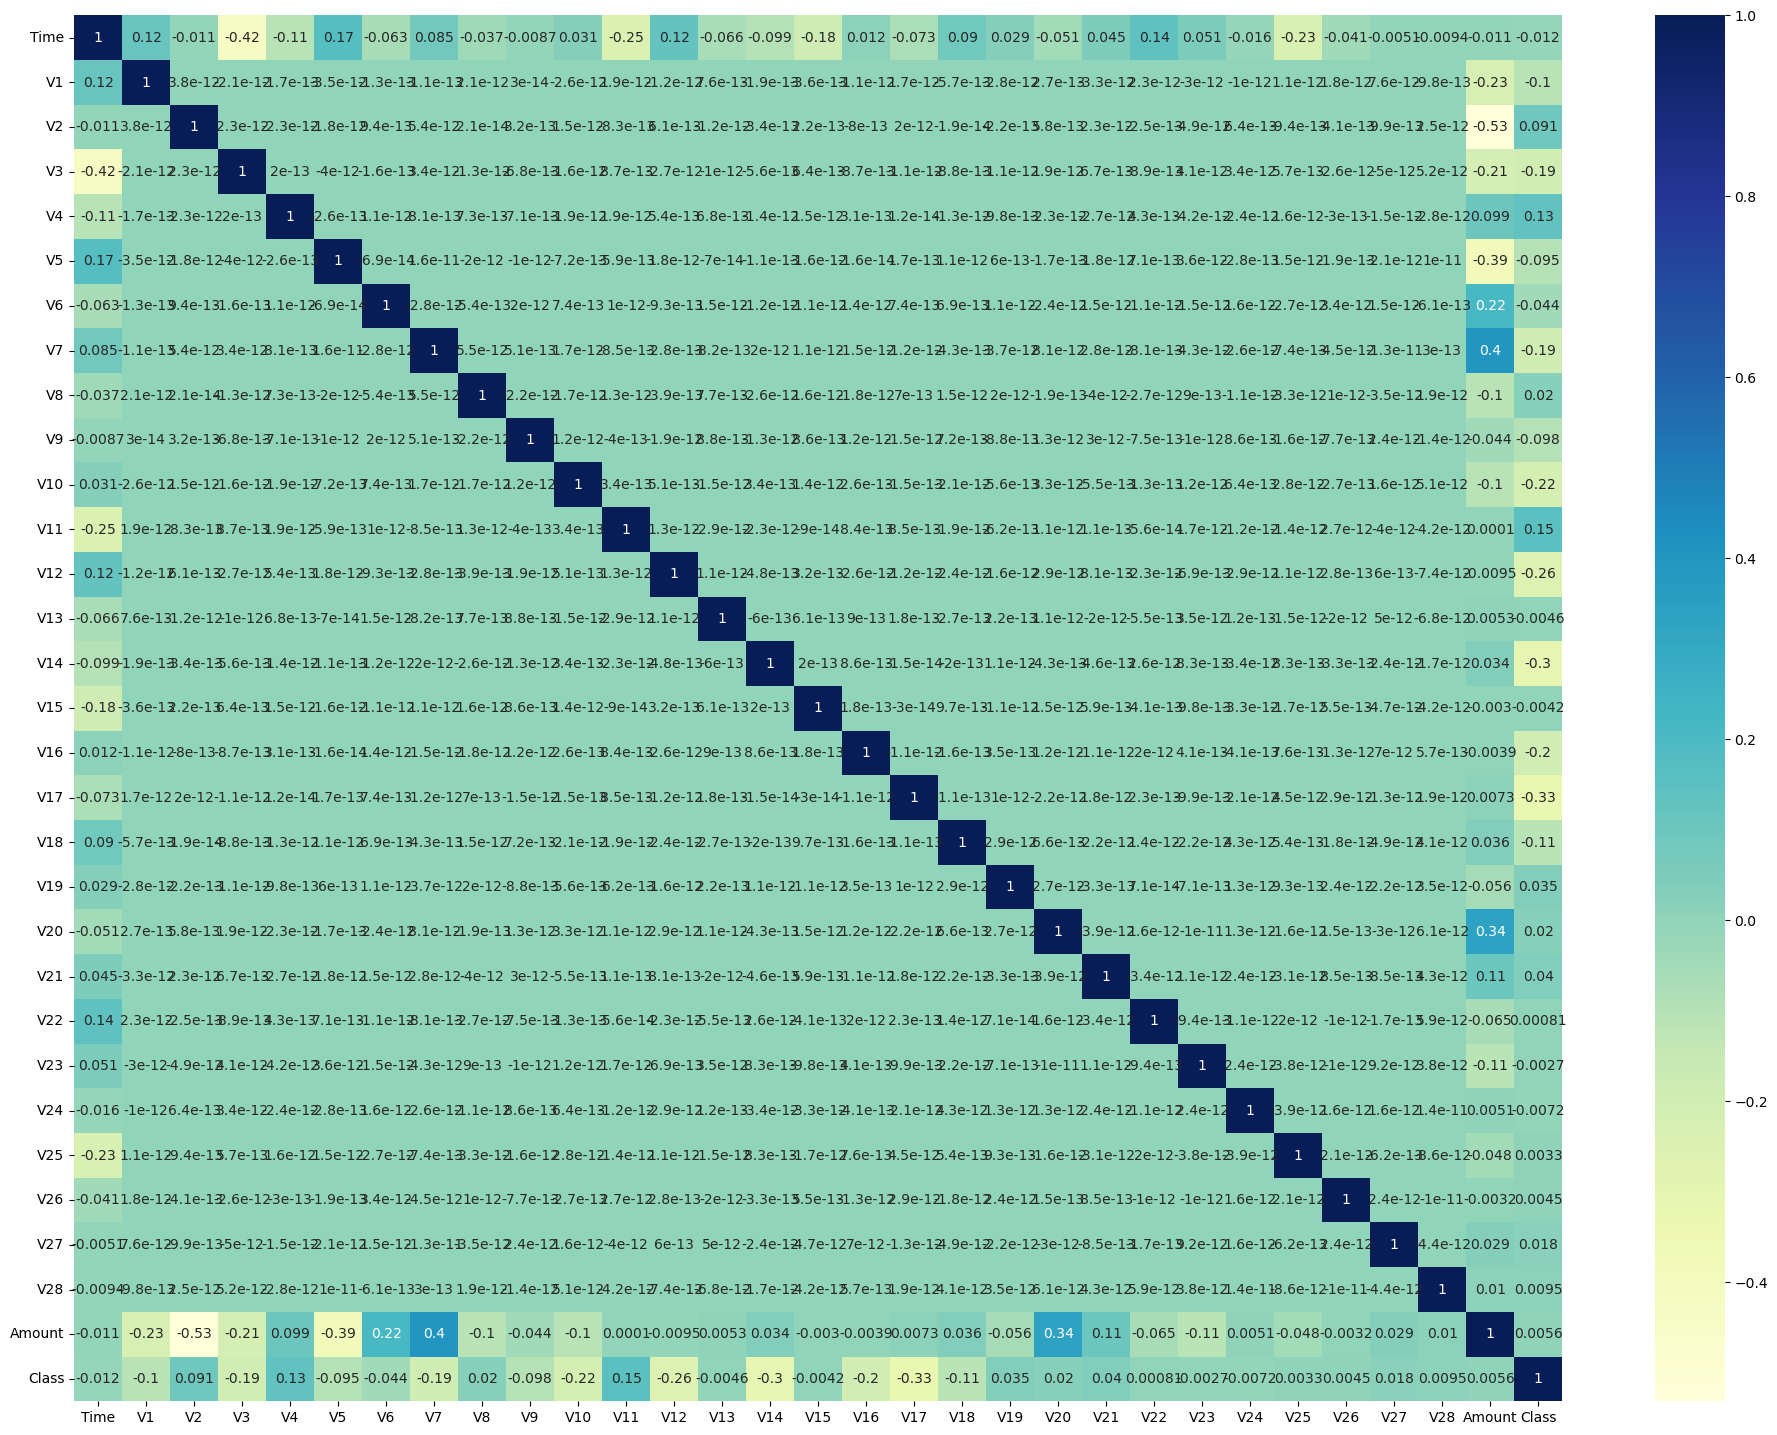

In [11]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


Interpretation:

V7 and V20 are positively correlated with the amount.
V2 and V5 are negatively correlated with the amount.

### Plotting distribution -  Barplot, Piechart

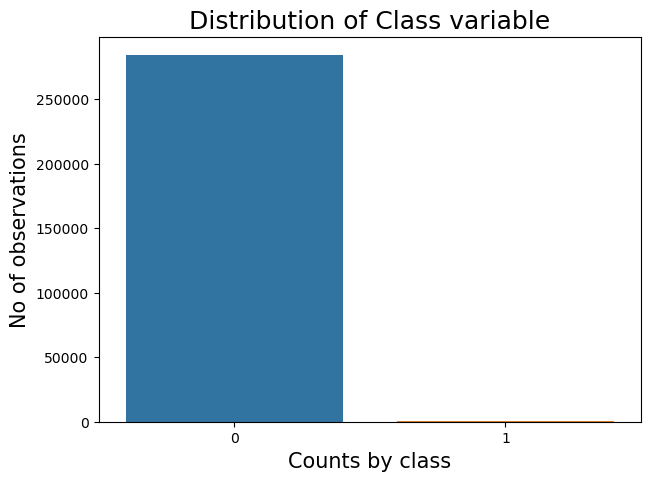

In [57]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(x= 'Class', data=df_creditcard)
plt.title("Distribution of Class variable", fontsize=18)
plt.xlabel("Counts by class", fontsize=15)
plt.ylabel("No of observations", fontsize=15)
plt.show()

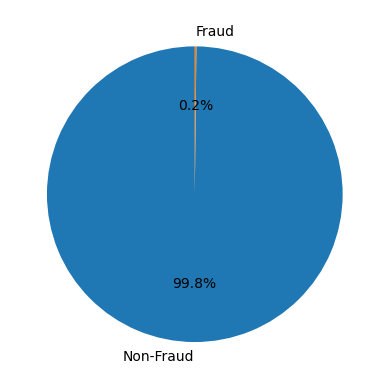

In [15]:
# Plot pie chart for the dsitribution of the Fraud vs Non-fraud in percentage')
classes=df_creditcard['Class'].value_counts(normalize=True)*100
Non_Fraud=classes[0]
Fraud=classes[1]

labels = 'Non-Fraud', 'Fraud'
sizes = [Non_Fraud, Fraud]
explode = (0, 0.1) 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

In [19]:
print("Interpretation")
print("***************************************************************")
print('The percentage of Fraud data is', Non_Fraud, '%')
print('The percentage of Non-Fraud is', Fraud, '%')
print('The Imbalance percentage is', Fraud/Non_Fraud*100)

Interpretation
***************************************************************
The percentage of Fraud data is 99.82725143693798 %
The percentage of Non-Fraud is 0.1727485630620034 %
The Imbalance percentage is 0.173047500131896


### Plot the distribution of Time vs Amount for Fraud/Non-Fraud data 

Plot the distribution between time vs. amount transaction for fraud/Non-fraud
***************************************************************


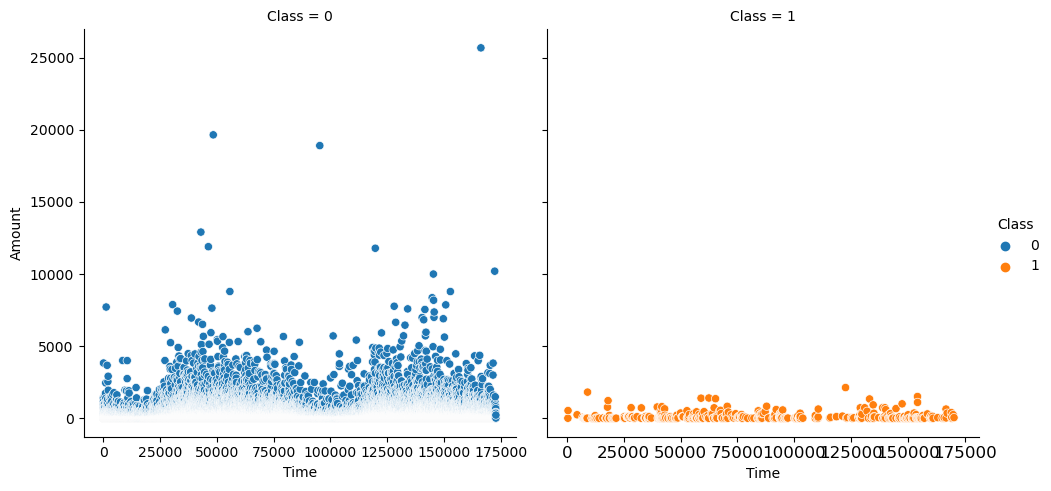

In [5]:

print("Plot the distribution between time vs. amount transaction for fraud/Non-fraud")
print("***************************************************************")
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=df_creditcard)
plt.tick_params(labelsize=12)
plt.show()

**Interpretation:**
    
The above plot for fraud data shows that the amount was less than 2.2k.
Time and Amount is less in Non-Fraud data as compared to Fraud data.

### We have 492 fraud transactions out of 284807 total credit card transactions.

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example.
To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

### Bivariate analysis - Class vs Amount

In [21]:
# Observe the summary of Amount details for Fraud data
print("Amount summary for fraud transaction :");
print("***************************************************************")
print(df_creditcard[df_creditcard['Class'] == 1]["Amount"].describe())

print("\n")

print("Amount summary for non_fraud transaction :");
print("***************************************************************")
print(df_creditcard[df_creditcard['Class'] == 0]["Amount"].describe())

Amount summary for fraud transaction :
***************************************************************
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Amount summary for non_fraud transaction :
***************************************************************
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

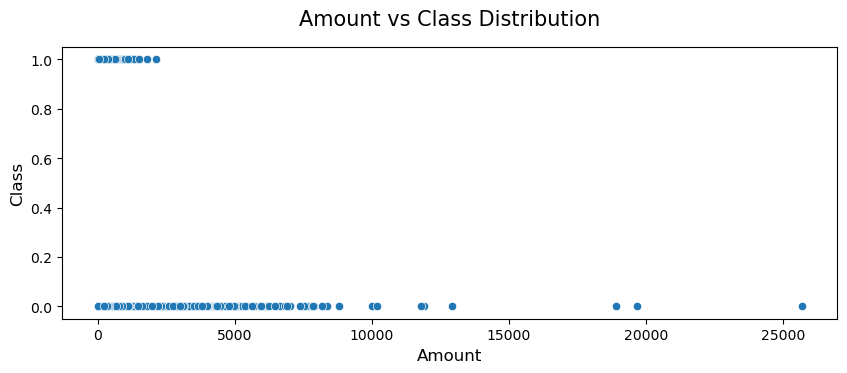

In [117]:
# Distribution of scatter plot of classes with Amount

fig = plt.figure(figsize=(10, 12))
cmap = sns.color_palette('Set1')

plt.subplot(3,1,1)
sns.scatterplot(x='Amount', y='Class', palette=cmap, data=df_creditcard)
plt.xlabel('Amount', size=12)
plt.ylabel('Class', size=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10) 
plt.title('Amount vs Class Distribution', size=15, y=1.05)


### Find the Highest Correlation of Independent variables with relative to Dependent variable

In [12]:
print("Highest correlation of independent features relative to target variable")
print("*********************************************************")
# add it in dataframe to be sorted
corr = pd.DataFrame(df_creditcard.corr()['Class'])
# add column label
corr.columns = ["Correlation"]
# sort based on highest correlation
corr.sort_values(by=['Correlation'], ascending=False)


Highest correlation of independent features relative to target variable
*********************************************************


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


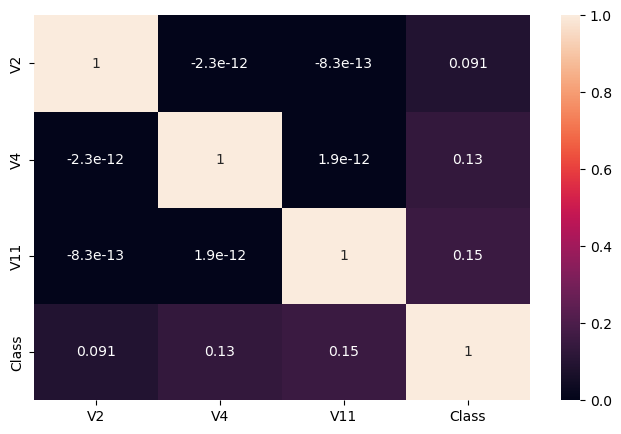

In [128]:
# Plot the heatmap for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df_creditcard[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [9]:
# Drop unnecessary columns
df_creditcard.drop('Time', axis = 1, inplace= True)

### Feature Scaling for Amount Variable

In [10]:
from sklearn.preprocessing import StandardScaler

df_creditcard['Amount'] = StandardScaler().fit_transform(df_creditcard['Amount'].values.reshape(-1,1)) 

### Splitting the data into train & test data

In [12]:
#Create X and y dataset for independent and dependent data
y= df_creditcard['Class']
X = df_creditcard.drop(['Class'], axis=1)

In [13]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [14]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

### Plotting the histogram distribution for each variable

In [15]:
cols = list(X.columns.values)
print("Total column list:\n",cols)

Total column list:
 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


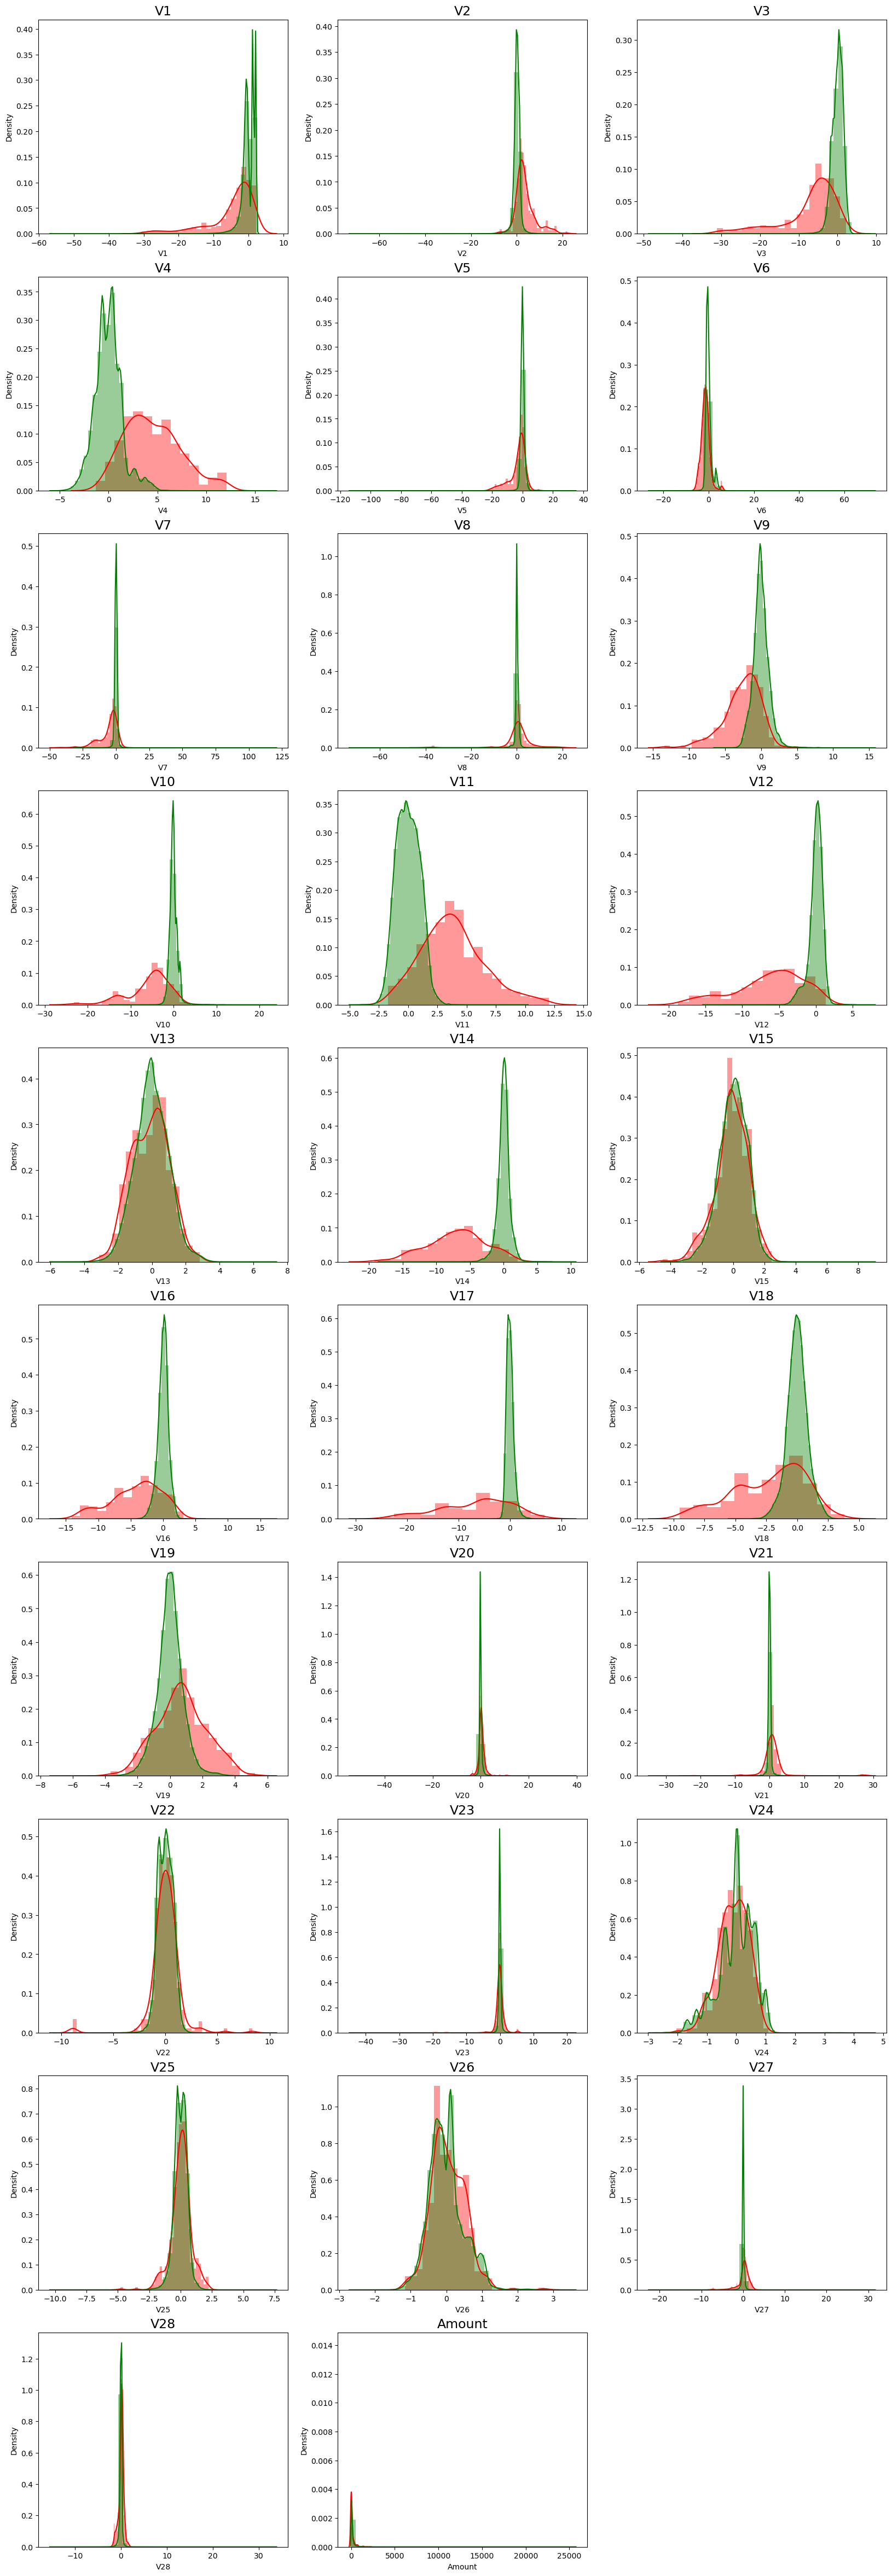

In [27]:
# plotting the histogram of a variable from the dataset to see the skewness
non_fraud = df_creditcard.Class == 0
fraud = df_creditcard.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][fraud], color='red')
    sns.distplot(X[col][non_fraud], color='green')
    plt.title(col, fontsize=17)
plt.show()

### Check the Mean, Variance, Skweness & kurtosis

In [12]:
# Check the skewness and kurtosis of non-fraud data.


Non_Fraud = df_creditcard[df_creditcard["Class"] == 0]
Fraud = df_creditcard[df_creditcard["Class"] == 1]

print ("Evaluate the Mean, Variance, skewness, and kurtosis of Non_Fraudulent data :")
print("**********************************************************************")
nf_mean = Non_Fraud.mean(axis = 0, skipna = True)
nf_var = Non_Fraud.var(axis = 0, skipna = True)
nf_skew = Non_Fraud.skew(axis = 0, skipna = True)
nf_kurt = Non_Fraud.kurtosis(axis = 0, skipna = True)


data_Non_Fraud = pd.concat([nf_mean, nf_var, nf_skew, nf_kurt] ,axis = 1)
data_Non_Fraud.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Non_Fraud=data_Non_Fraud.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Non_Fraud)

# -------------------------------------------------------------------------------------------------------------
print("")
# Fraudulent = to check the skewness and kurtosis

print ("Evaluate the Mean, Variance, skewness, and kurtosis of Fraudulent data :")
print("**********************************************************************")
f_mean = Fraud.mean(axis = 0, skipna = True)
f_var = Fraud.var(axis = 0, skipna = True)
f_skew = Fraud.skew(axis = 0, skipna = True)
f_kurt = Fraud.kurtosis(axis = 0, skipna = True)

data_Fraud = pd.concat([f_mean, f_var, f_skew, f_kurt] ,axis = 1)
data_Fraud.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Fraud=data_Fraud.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Fraud)

Evaluate the Mean, Variance, skewness, and kurtosis of Non_Fraudulent data :
**********************************************************************
   Variables      Mean       Var   Skewness    kurtosis
0         V1  0.008258  3.724182  -3.130188   31.065568
1         V2 -0.006271  2.676974  -4.887166   98.406211
2         V3  0.012171  2.129933  -1.453676   14.545345
3         V4 -0.007860  1.958134   0.581137    2.095716
4         V5  0.005453  1.841318  -2.213903  217.852170
5         V6  0.002419  1.768669   1.842604   42.987534
6         V7  0.009637  1.389598   4.747800  452.920870
7         V8 -0.000987  1.348579  -8.395492  209.772662
8         V9  0.004467  1.186731   0.665635    3.196847
9        V10  0.009824  1.090361   2.422278   21.961970
10       V11 -0.006576  1.006233   0.145537    0.035641
11       V12  0.010832  0.894801  -1.256301    5.300894
12       V13  0.000189  0.990157   0.065582    0.196578
13       V14  0.012064  0.804621  -0.703857    7.719480
14       V15

**Interpretation:**

Skewness = 0 : normally distributed. ; a zero value means that the tails on both sides of the mean balance out overall,
Skewness > 0: more weight in the left tail of the distribution.
Skewness < 0: more weight in the right tail of the distribution.

In [13]:
print('Positive skewness: Mean > Median')
print("********************************************")

# Fraudulent : Evaluate the number of positive skewness variables

print('Non Fraud: Left/Positive skewed')
leftskewed_Non_Fraud= data_Non_Fraud[data_Non_Fraud.Skewness >0]
print(leftskewed_Non_Fraud['Variables'].unique())

# ---------------------------------------------------------------------------------------

# Fraudulent : Evaluate the number of positive/left skewed variables

print('Fraud - Left/Positive skewness:')
leftskewned_Fraud = data_Fraud[data_Fraud.Skewness >0]
print(leftskewned_Fraud['Variables'].unique())

Positive skewness: Mean > Median
********************************************
Non Fraud: Left/Positive skewed
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
Fraud - Left/Positive skewness:
['V2' 'V4' 'V6' 'V11' 'V19' 'V20' 'V21' 'V26' 'Amount']


In [14]:
print('Negative skewness: Median > Mean')
print("********************************************")

# Fraudulent : Evaluate the number of Right/Negative skewed variables

print('Non Fraud: Right/Negative skewed')
leftskewed_Non_Fraud= data_Non_Fraud[data_Non_Fraud.Skewness < 0]
print(leftskewed_Non_Fraud['Variables'].unique())

# ---------------------------------------------------------------------------------------

# Fraudulent : Evaluate the number of Right/Negative skewed variables

print('Fraud - Right/Negative skewness:')
leftskewned_Fraud = data_Fraud[data_Fraud.Skewness < 0]
print(leftskewned_Fraud['Variables'].unique())

Negative skewness: Median > Mean
********************************************
Non Fraud: Right/Negative skewed
['V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22' 'V23'
 'V24' 'V25' 'V27']
Fraud - Right/Negative skewness:
['V1' 'V3' 'V5' 'V7' 'V8' 'V9' 'V10' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17'
 'V18' 'V22' 'V23' 'V24' 'V25' 'V27' 'V28']


## Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

## Model Building with imbalanced data
We will create models using the algorithms listed below, then compare them to see which model performs the best. We do not use SVM, RandomForest, or KNN when developing models because they are computationally demanding and require a lot of processing power, particularly for SVM and KNN. KNN algorithms compute the distance between each data point, and to get the closest neighbor, this computation is repeated for each data point. In cases where the data set is quite huge, this technique becomes highly costly computationally. We are omitting these models because we do not currently have these resources available.
- Logistic Regression
- Decision Tree
- XGBoost

#### Metric selection on imbalance data
For the purpose of evaluating the model, we will employ the ROC-AUC score as the assessment metric. Since there are very few fraud incidents overall and the data is very skewed, accuracy is not the appropriate statistic to assess the model.

In [16]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value','threshold'])

In [17]:
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraud','Fraud']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [18]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
    from sklearn import linear_model #import the package
    from sklearn.model_selection import KFold

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

    searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
    print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_) 
    print(searchCV_l2.scores_) 

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_) 
    print(searchCV_l1.scores_) 


  #find predicted vallues
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))
    print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    from sklearn.metrics import roc_auc_score
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}" .format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}" .format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
    return df_Results

In [19]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    #Evaluate Decision Tree model with 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    criteria = ['gini', 'entropy'] 
    scores = {} 
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42) 
        dt.fit(X_train, y_train) 
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test) 
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score 
        print(c + " score: {0}" .format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}" .format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results
      


In [20]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
    # fit model no training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results
  



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [21]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [22]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

In [23]:
X_train_pt_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.414341,-0.352037,-0.599219,-0.067550,-0.129205,0.326372,-0.541033,0.115625,1.025773,0.005709,...,-0.223245,-0.256588,-0.668354,0.543815,0.000923,-0.840953,-0.574979,-0.011226,-0.133703,-1.048167
1,-0.343333,0.427569,0.256780,0.679871,0.243257,0.179406,0.503851,-0.125500,-0.649147,0.314539,...,0.263948,-0.156535,-0.378679,-0.188657,-0.776852,-0.981064,1.417840,-0.026888,0.459515,0.004774
2,-1.474262,-1.175561,0.855950,0.569615,0.787904,-0.049687,-0.370444,0.923863,-0.529840,-0.907168,...,1.087460,0.396218,-0.454678,0.334451,-0.530882,0.437817,0.722656,-0.260684,-1.137282,1.579120
3,1.241902,-0.686705,-1.042562,-0.081862,-0.419771,-1.002720,0.200703,-0.572151,-0.729926,0.745982,...,-0.255596,-0.557964,-1.230034,0.211300,0.029927,-0.499203,0.970393,-0.244245,-0.085740,1.583489
4,1.636001,-0.424955,-1.004673,-0.627617,-0.300834,-1.209461,-0.095084,-0.493504,-0.633904,0.803305,...,-0.061150,0.087590,0.156477,0.338766,-0.233768,-0.160767,-0.599292,-0.117488,-0.186304,-0.791337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.629084,0.214176,0.615004,-1.151621,-0.619547,0.727173,-1.898263,-3.085415,-1.145886,-0.129756,...,0.601080,0.736453,0.761310,-1.139853,-0.638310,3.124784,0.539173,0.324360,0.512942,0.310750
227841,-1.382569,-1.226421,0.266853,-0.864237,0.789267,-0.822236,-0.587450,0.634832,-1.644831,0.130868,...,-0.687451,-0.706989,-2.049155,1.271053,-0.643206,-1.248357,1.003895,-0.446251,-0.072121,-0.039145
227842,-1.080496,-0.417911,-0.335120,0.434676,-0.322521,0.186123,3.066862,-0.474847,-1.524427,-1.017297,...,1.630173,0.813850,0.746142,1.290916,-0.071073,3.458240,-0.602887,-0.595452,0.233604,2.042260
227843,-0.458810,0.580650,0.030901,0.346849,0.430919,-0.591137,0.757867,-0.347855,0.100208,-0.036084,...,-0.503775,0.393526,1.200123,-0.212248,-0.136562,-0.015481,-1.246695,-0.708830,0.065359,-1.004574


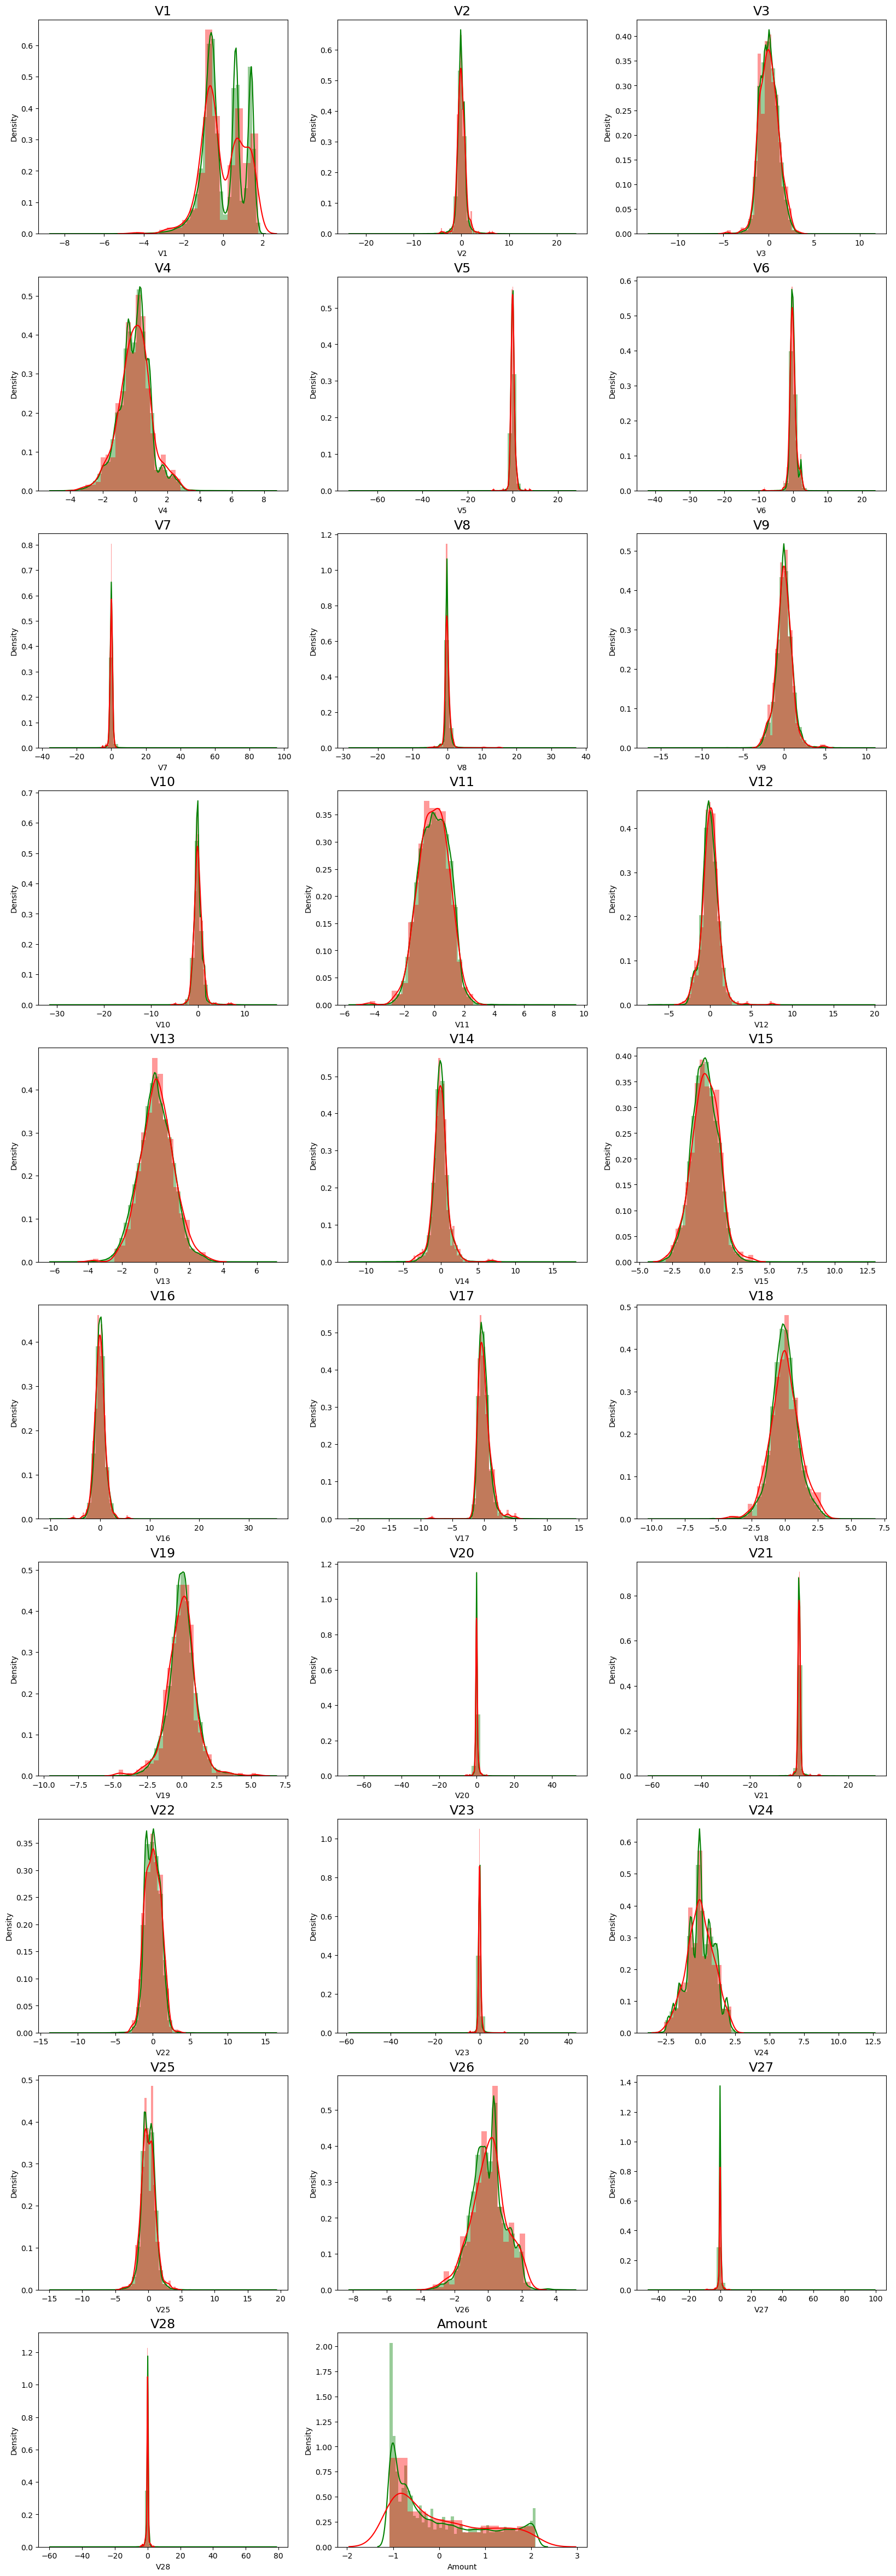

In [23]:
# plot the histogram of a variable from the train dataset again to see the result 
non_fraud = df_creditcard.Class == 0
fraud = df_creditcard.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_pt_df[col][non_fraud], color='green')
    sns.distplot(X_train_pt_df[col][fraud], color='red')
    plt.title(col, fontsize=17)
plt.show()


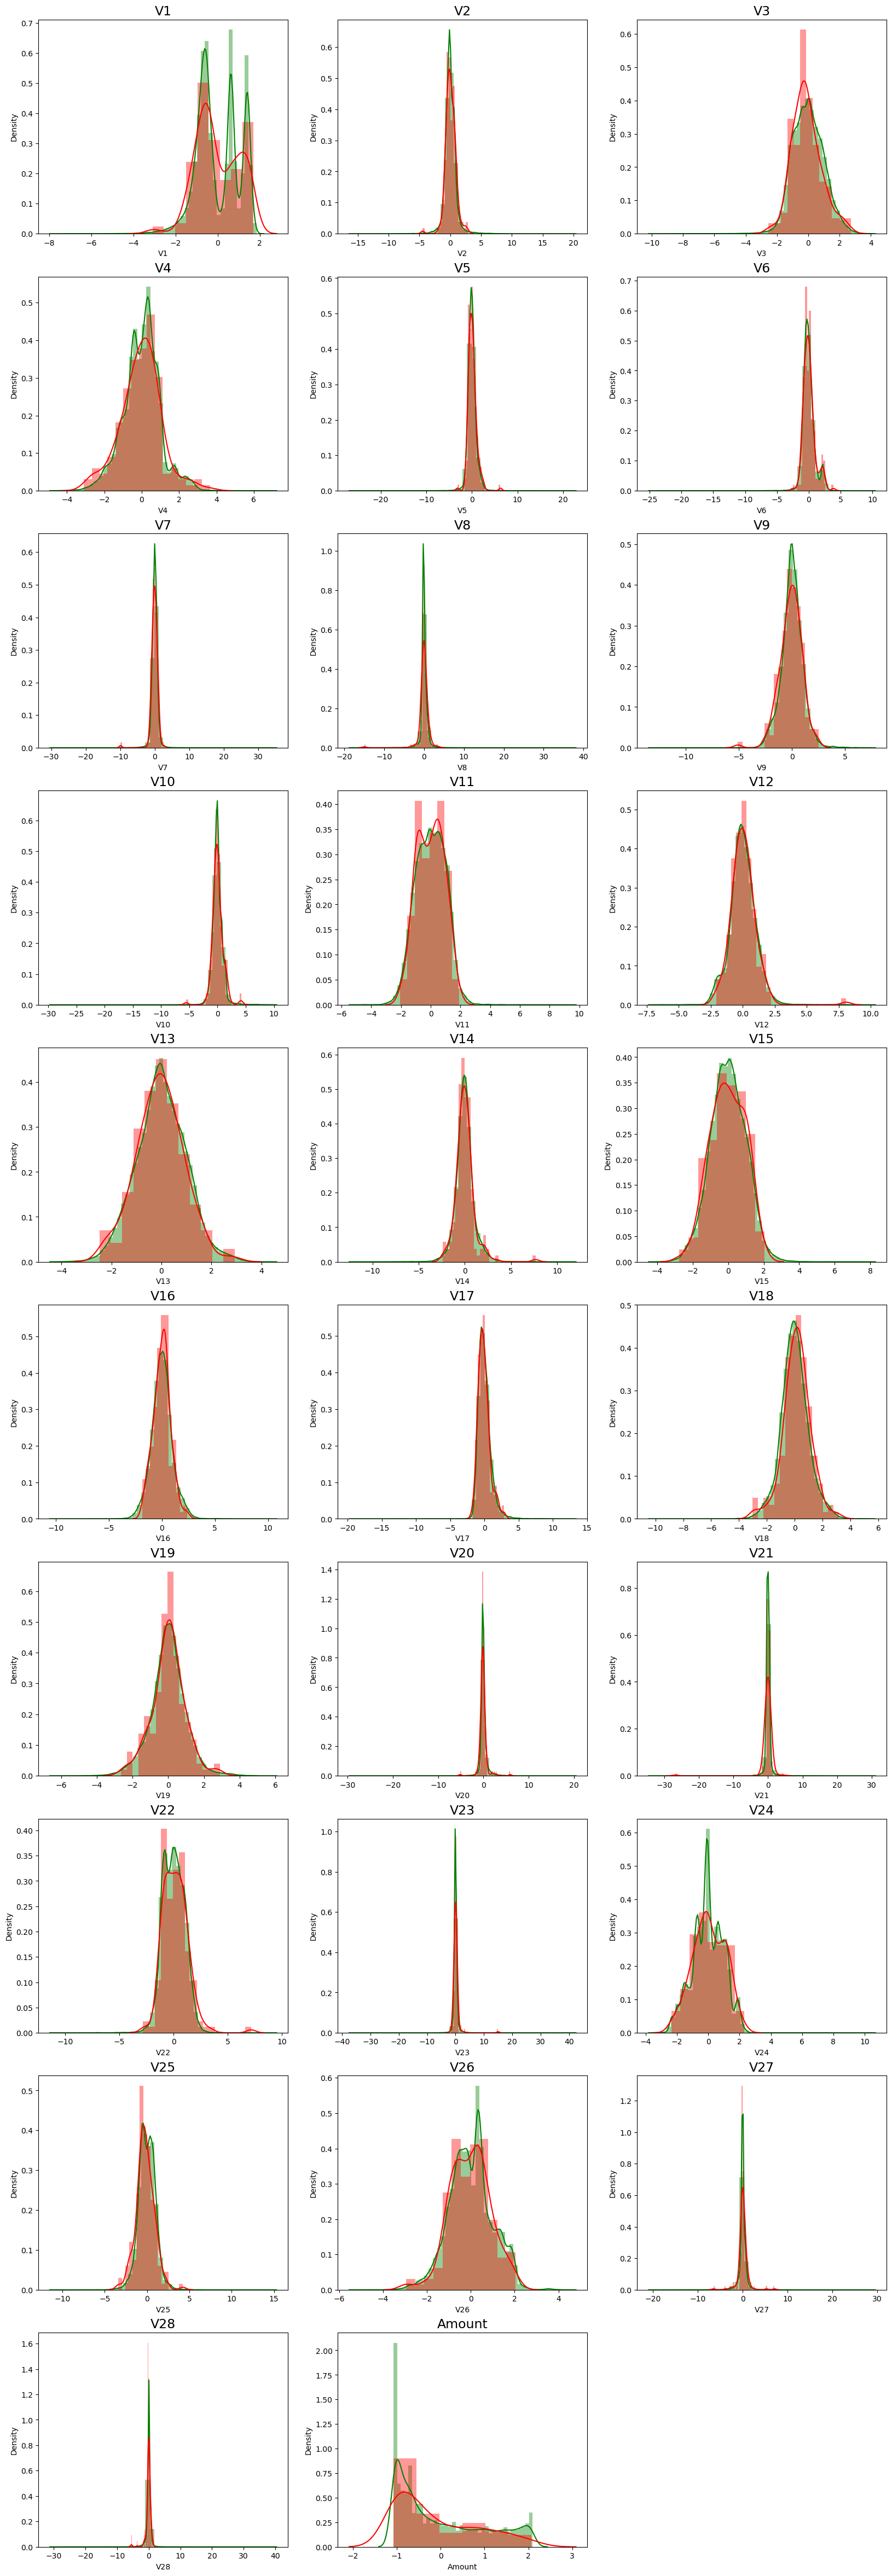

In [26]:
# plot the histogram of a variable from the test dataset again to see the result 

non_fraud = df_creditcard.Class == 0
fraud = df_creditcard.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_test_pt_df[col][non_fraud], color='green')
    sns.distplot(X_test_pt_df[col][fraud], color='red')
    plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9836923115628171
Max auc_roc for l1: 0.9851944648081213
Parameters for l2 regularisations
[[-0.08654341 -0.0615015  -0.28252407  0.54976     0.03365362  0.01161079
  -0.06619787 -0.20604487 -0.19114767 -0.20457448  0.17169462 -0.48332054
  -0.12557383 -0.67410466 -0.0756862  -0.17561281 -0.08530843  0.03679026
  -0.03695294 -0.02415635  0.10202363  0.09822912 -0.03094244 -0.02886217
   0.01064962  0.00958781 -0.04432417 -0.02269118  0.06927633]]
[-8.05806873]
{1: array([[0.90221304, 0.9020775 , 0.9020775 , 0.90207506, 0.90207506,
        0.90249755, 0.96806087, 0.9929594 , 0.99542227, 0.99612315,
        0.99612315, 0.99612315, 0.99612315, 0.99612315, 0.99612315,
        0.99612315, 0.99612315, 0.99612315, 0.99612315, 0.99612315],
       [0.93345347, 0.93345218, 0.93345218, 0.93345218, 0.93345477,
        0.93378054, 0.96594978, 0.98021031, 0.97835131, 0.97722143,
        0.97722143, 0.97722143, 0.97722143, 0.97722

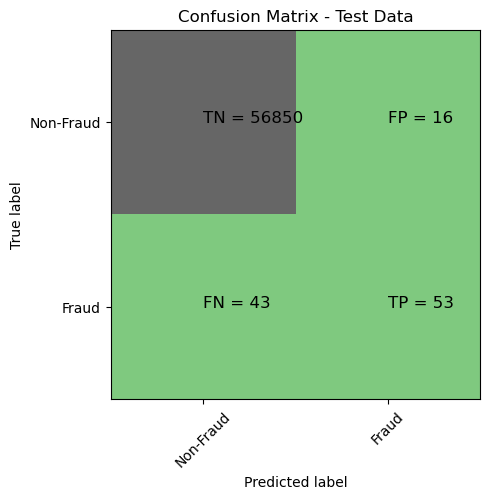

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.55      0.64        96

    accuracy                           1.00     56962
   macro avg       0.88      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


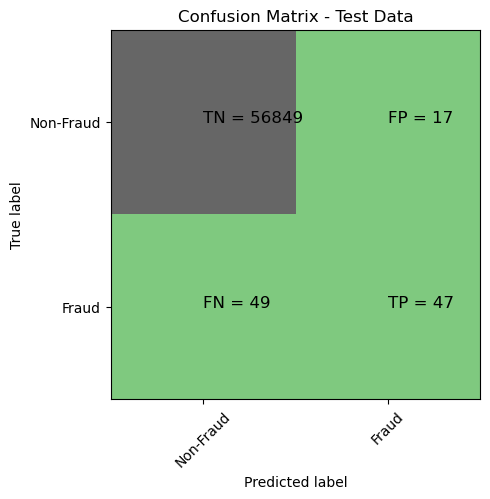

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9662450248537497
l2 threshold: 0.0012531999870642472
ROC for the test dataset 96.6%


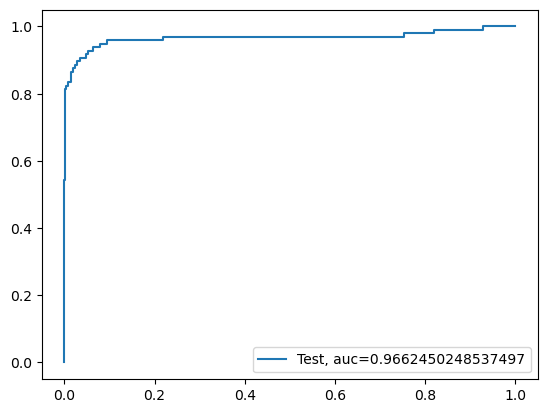

l1 roc_value: 0.9716656628448164
l1 threshold: 0.009056459447895609
ROC for the test dataset 97.2%


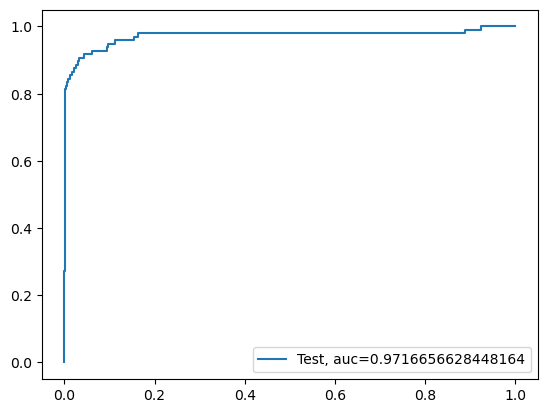

Time Taken by Model: --- 356.6913857460022 seconds ---
--------------------------------------------------------------------------------


In [20]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
#start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
#start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [26]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966245,0.001253
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971666,0.009056
2,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
3,Power Transformer,XGBoost,0.999421,0.972360,0.000036


# Perform cross validation with RepeatedKFold

In [27]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     1      2      3 ... 284802 284804 284806] TEST: [     0      8     16 ... 284798 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     7      9     10 ... 284782 284792 284797]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     5     14     23 ... 284799 284801 284806]
TRAIN: [     0      1      4 ... 284803 284805 284806] TEST: [     2      3      6 ... 284794 284800 284804]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      4     13 ... 284793 284795 284802]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4     15     20 ... 284776 284778 284794]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2      5 ... 284785 284799 284803]
TRAIN: [     1      2      3 ... 284803 284805 284806] TEST: [     0     10     11 ... 284795 284801 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6     17     18 ... 284787 284788 284792]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9834509557993585
Max auc_roc for l1: 0.9842785406373077
Parameters for l2 regularisations
[[-0.01141175  0.02558874 -0.08111488  0.24127353  0.0786043  -0.03826899
  -0.01358995 -0.12301122 -0.08409927 -0.16851919  0.13893411 -0.20168841
  -0.03936339 -0.37252595 -0.00930202 -0.09735464 -0.10108989 -0.00639636
  -0.00450168 -0.00844099  0.05242798  0.02682333 -0.00950092 -0.01374572
  -0.0121941   0.00395659 -0.01574026 -0.00577336  0.02938699]]
[-7.40757535]
{1: array([[0.98259089, 0.98259089, 0.98259089, 0.98259089, 0.98259215,
        0.98290235, 0.99003579, 0.98856641, 0.98055887, 0.97155667,
        0.96763328, 0.96763328, 0.96763328, 0.96763328, 0.96763328,
        0.96763328, 0.96763328, 0.96763328, 0.96763328, 0.96763328],
       [0.99265241, 0.99265241, 0.99265241, 0.99265241, 0.99265241,
        0.99276627, 0.99712206, 0.99817607, 0.99851538, 0.9982933 ,
        0.9982933 , 0.9981445 , 0.9981445 , 0.99814

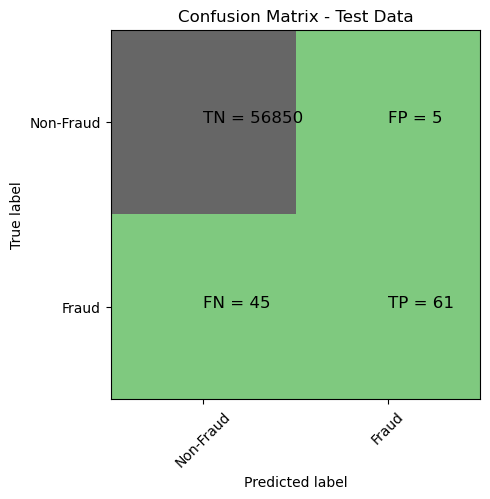

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.92      0.58      0.71       106

    accuracy                           1.00     56961
   macro avg       0.96      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9992275416513052
Confusion Matrix


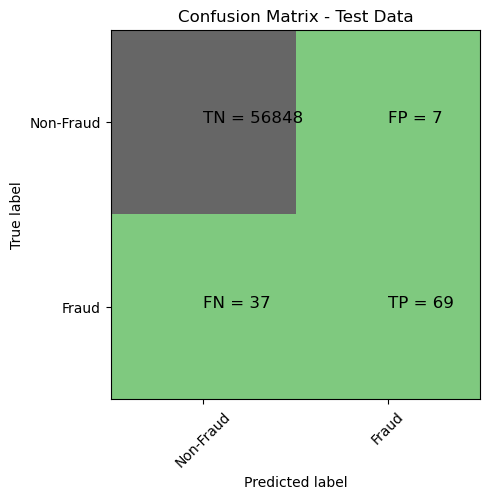

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.91      0.65      0.76       106

    accuracy                           1.00     56961
   macro avg       0.95      0.83      0.88     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.984680161217795
l2 threshold: 0.0015789547847369217
ROC for the test dataset 98.5%


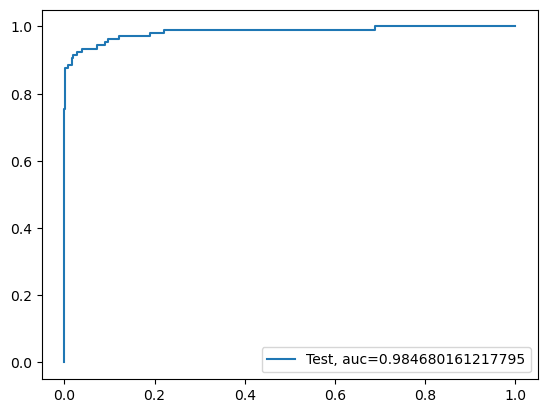

l1 roc_value: 0.9821387740743998
l1 threshold: 0.0032290966906311663
ROC for the test dataset 98.2%


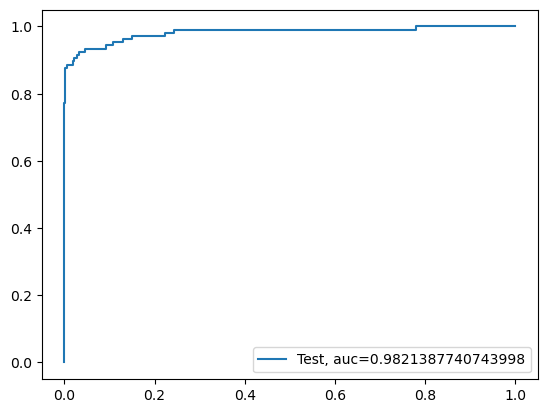

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990695388072541
Confusion Matrix


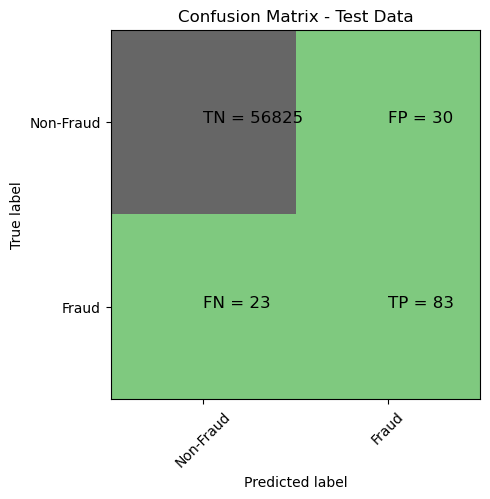

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.73      0.78      0.76       106

    accuracy                           1.00     56961
   macro avg       0.87      0.89      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8912456049234814
Tree threshold: 1.0
ROC for the test dataset 89.1%


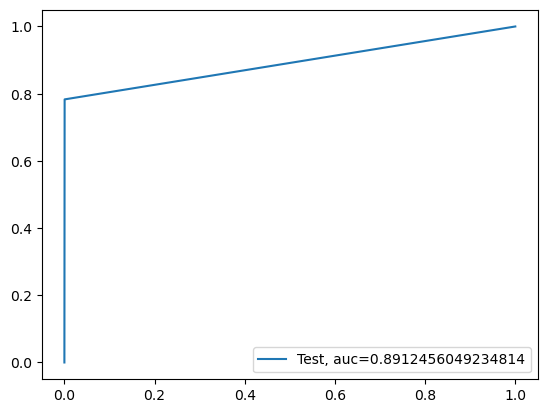

entropy score: 0.9990168711925703
Confusion Matrix


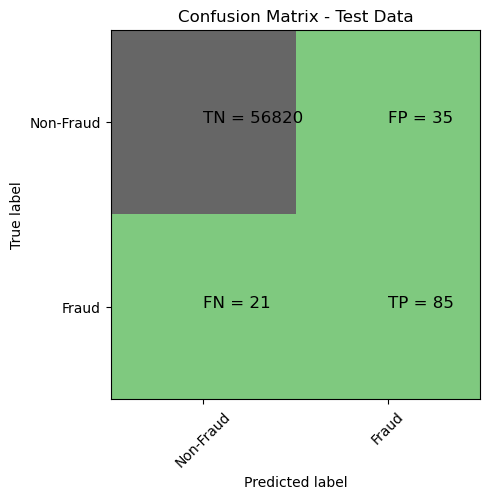

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.71      0.80      0.75       106

    accuracy                           1.00     56961
   macro avg       0.85      0.90      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.9006355956811684
Tree threshold: 1.0
ROC for the test dataset 90.1%


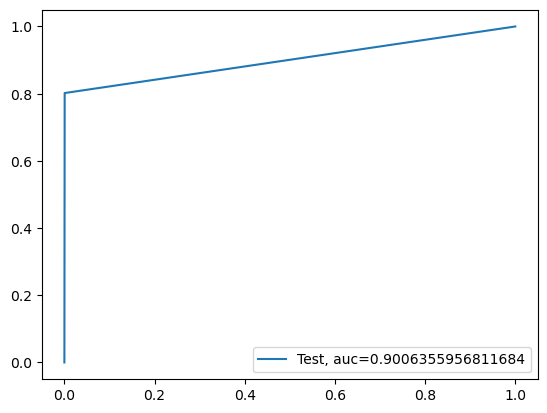

--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


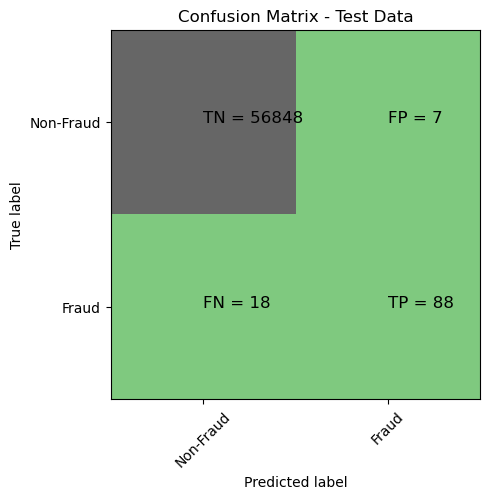

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.93      0.83      0.88       106

    accuracy                           1.00     56961
   macro avg       0.96      0.92      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.97596351526475
XGBoost threshold: 0.00019997532945126295
ROC for the test dataset 97.6%


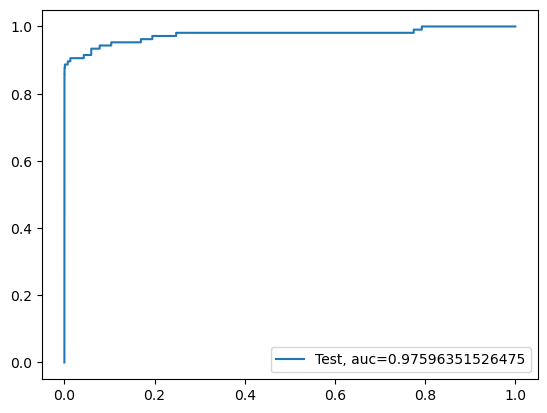

--------------------------------------------------------------------------------


In [28]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
#start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
#start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [29]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966245,0.001253
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971666,0.009056
2,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
3,Power Transformer,XGBoost,0.999421,0.972360,0.000036
4,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999122,0.984680,0.001579
5,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999228,0.982139,0.003229
6,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999017,0.900636,1.000000
7,RepeatedKFold Cross Validation,XGBoost,0.999561,0.975964,0.000200


#### It seems XGBoost with Repeated KFold cross validation has provided us with best results with ROC_Value of 0.975964

In [30]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


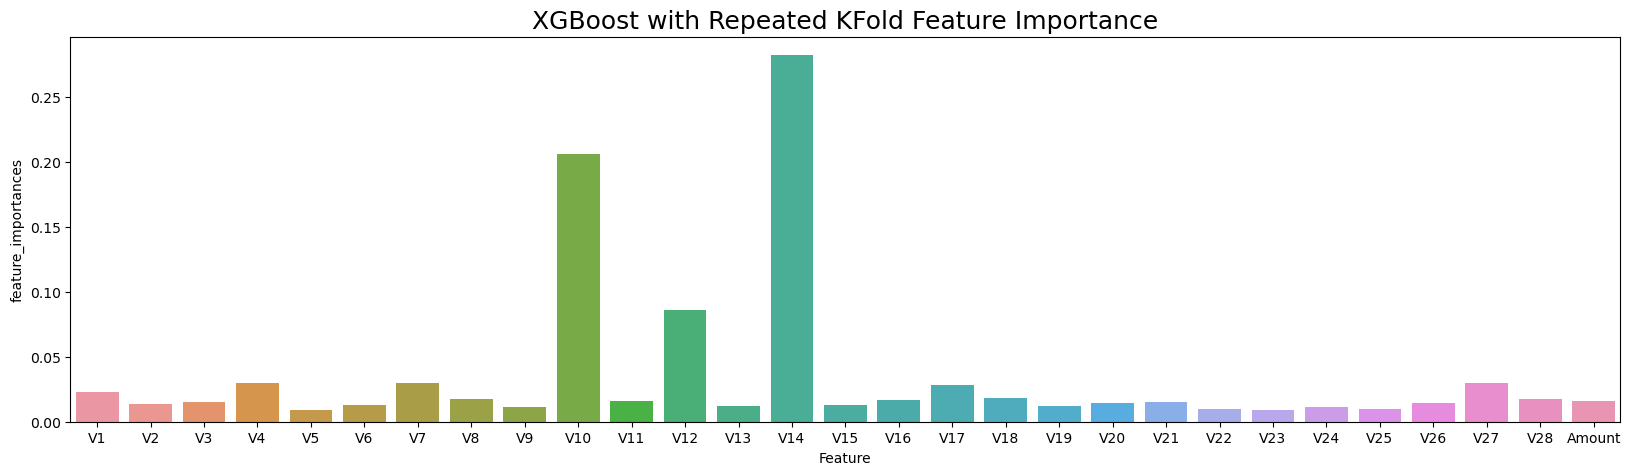

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [32]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore building models with stratifiedKfold cross validation :
- Logistic
- Decision Tree
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9818543368511594
Max auc_roc for l1: 0.9777739030089986
Parameters for l2 regularisations
[[-1.59520893e-03  3.94993436e-02 -7.31755405e-02  2.22620567e-01
   4.21856844e-02 -2.51699847e-02 -7.67984155e-03 -1.19203338e-01
  -7.08363144e-02 -1.67177266e-01  1.28364969e-01 -1.92181916e-01
  -3.60737756e-02 -3.58210409e-01  4.63679862e-03 -8.75236902e-02
  -7.37946764e-02  2.70537716e-04  1.43855851e-03 -1.30071882e-02
   4.22389170e-02  1.87040565e-02 -1.79284579e-02 -9.54836310e-03
  -8.91137702e-03  5.34204908e-03 -8.81600355e-03 -5.65030246e-04
   3.56630747e-02]]
[-7.36286097]
{1: array([[0.98725163, 0.98722345, 0.98722345, 0.98722345, 0.98722232,
        0.98740156, 0.99060641, 0.99266256, 0.9903415 , 0.99104604,
        0.99121514, 0.99121514, 0.99121514, 0.99121514, 0.99121514,
        0.99121514, 0.99121514, 0.99121514, 0.99121514, 0.99121514],
       [0.95880829, 0.95874373, 0.95874373, 0.95874373, 0.9587456

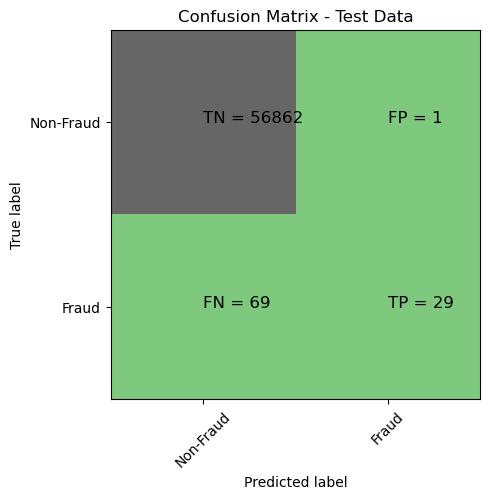

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9989115359632029
Confusion Matrix


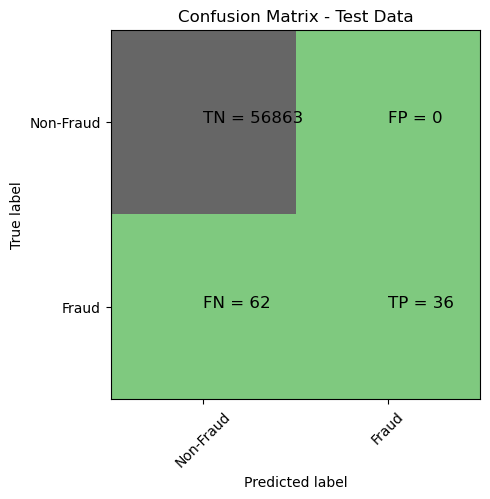

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.37      0.54        98

    accuracy                           1.00     56961
   macro avg       1.00      0.68      0.77     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9829739362815102
l2 threshold: 0.0014499909219753031
ROC for the test dataset 98.3%


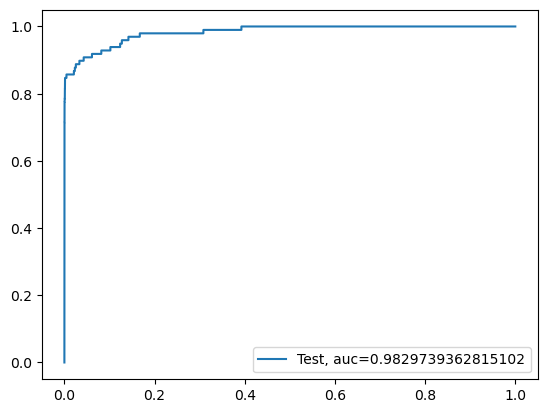

l1 roc_value: 0.9846681264349293
l1 threshold: 0.010572614367893307
ROC for the test dataset 98.5%


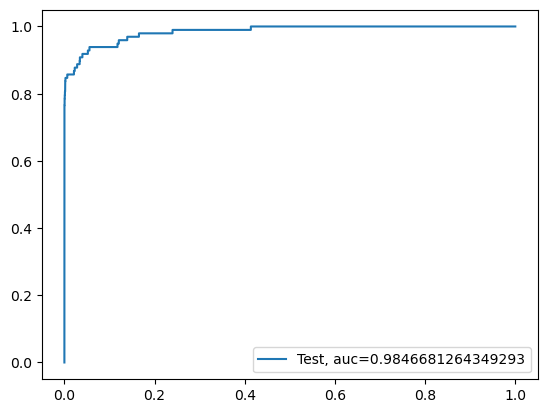

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
Confusion Matrix


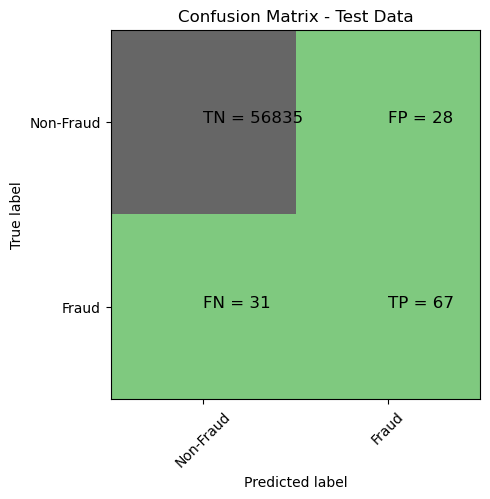

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


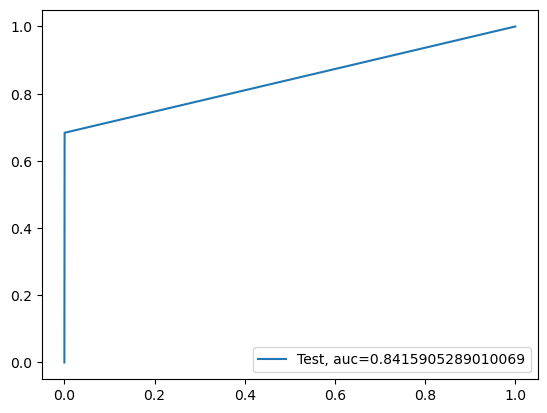

entropy score: 0.9990870946788153
Confusion Matrix


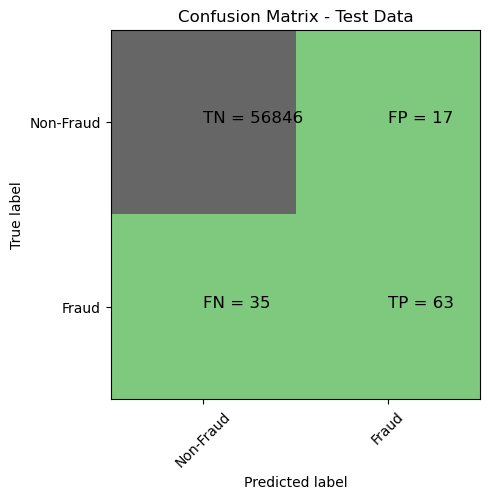

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


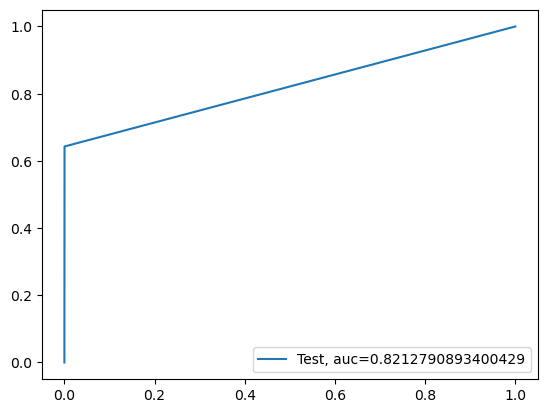

--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


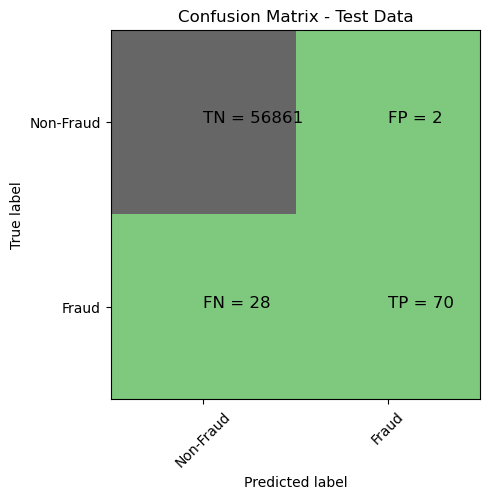

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9812878213909766
XGBoost threshold: 6.587481766473502e-05
ROC for the test dataset 98.1%


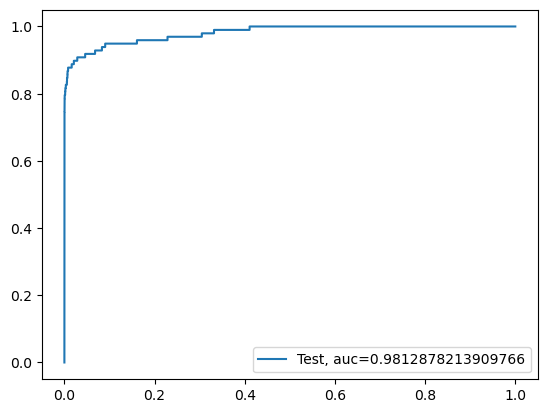

--------------------------------------------------------------------------------


In [33]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
#start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


#Run XGBoost Model
print("XGBoost Model")
#start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [34]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966245,0.001253
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971666,0.009056
2,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
3,Power Transformer,XGBoost,0.999421,0.972360,0.000036
4,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999122,0.984680,0.001579
5,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999228,0.982139,0.003229
6,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999017,0.900636,1.000000
7,RepeatedKFold Cross Validation,XGBoost,0.999561,0.975964,0.000200
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.982974,0.001450
9,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998912,0.984668,0.010573


**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [35]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.9856717746556027
Parameters for l2 regularisations
[[ 0.01502065  0.01707383 -0.09567497  0.23974152  0.07161974 -0.04234087
  -0.01853018 -0.11127697 -0.09401128 -0.17790877  0.13561454 -0.20718385
  -0.04259097 -0.37681841 -0.00932811 -0.10351254 -0.11540819 -0.00777582
   0.01338168  0.00293647  0.04103634  0.02152926 -0.00265355 -0.01520024
  -0.00951929  0.00476721 -0.00156931 -0.00063086  0.02809118]]
[-7.39007296]
{1: array([[0.99110584, 0.99110462, 0.99110462, 0.99110462, 0.99110339,
        0.99119375, 0.99406323, 0.9943978 , 0.99443199, 0.99377384,
        0.99377384, 0.99377384, 0.99377384, 0.99377384, 0.99377384,
        0.99377384, 0.99377384, 0.99377384, 0.99377384, 0.99377384],
       [0.96824057, 0.96824445, 0.96824445, 0.96824445, 0.96824315,
        0.96818757, 0.96963676, 0.97502114, 0.97950316, 0.98175646,
        0.98175646, 0.98175646, 0.98175646, 0.98175646, 0.98175646,
        0.98175646, 0.98175646, 0.98175646, 0.98175646, 0.98175646],
   

In [36]:
searchCV_l2.coef_

array([[ 0.01502065,  0.01707383, -0.09567497,  0.23974152,  0.07161974,
        -0.04234087, -0.01853018, -0.11127697, -0.09401128, -0.17790877,
         0.13561454, -0.20718385, -0.04259097, -0.37681841, -0.00932811,
        -0.10351254, -0.11540819, -0.00777582,  0.01338168,  0.00293647,
         0.04103634,  0.02152926, -0.00265355, -0.01520024, -0.00951929,
         0.00476721, -0.00156931, -0.00063086,  0.02809118]])

In [37]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [38]:
coefficients

,Feature,Importance Coefficient
0,V1,0.015021
1,V2,0.017074
2,V3,-0.095675
3,V4,0.239742
4,V5,0.071620
5,V6,-0.042341
6,V7,-0.018530
7,V8,-0.111277
8,V9,-0.094011
9,V10,-0.177909


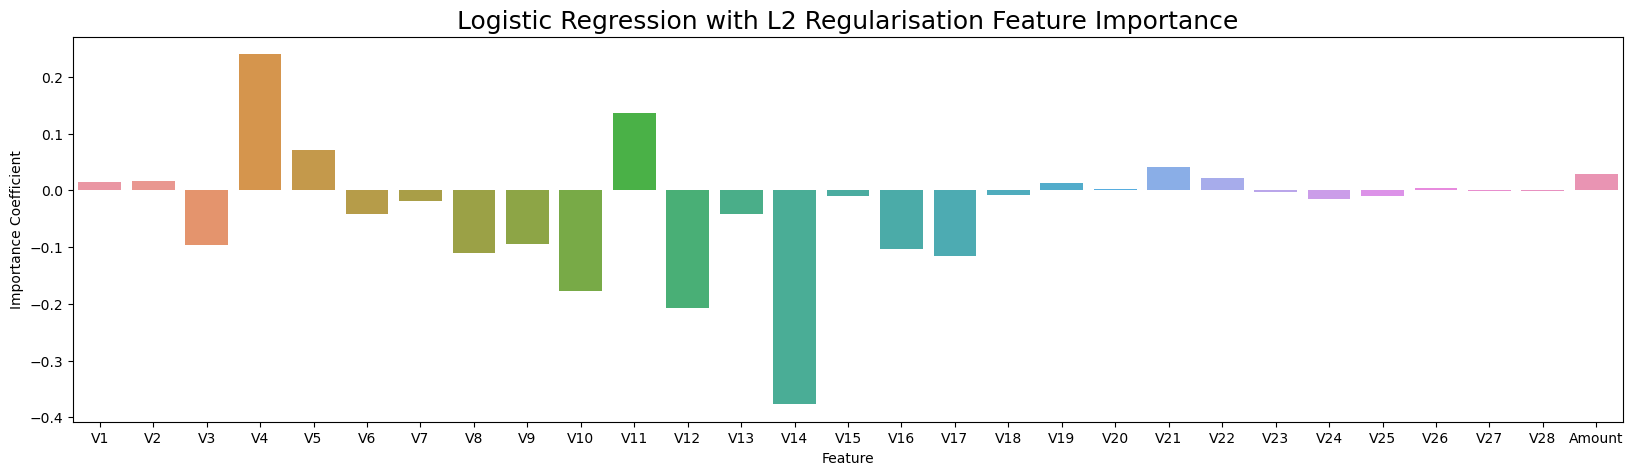

In [39]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()



**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

## Build Model with balancing techniques

As data is highly imbalanced we have only 492 records in fraud and 28407 records in non-fraud. model will show biasness towards the majority category. Hence we need to perform balancing techniques using below:

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

#### RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**

- First we will display class distibution with and without the Random Oversampling.

- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L1 & L2 Regularisation	
2. Decision tree model with Gini & Entropy criteria
3. XGBoost

- We did try KNN, SVM & RandomForest model , but due to extensive processive power requirement we avoided useing the model.

- Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [1]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler




ImportError: cannot import name 'BaseEstimator' from partially initialized module 'sklearn.base' (most likely due to a circular import) (C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py)

In [0]:
Data_Imbalance_Handling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handling , X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
#start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
#start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9865025591927999
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.36886344  0.38435425  0.28081628  0.84058165  0.34636546 -0.48593156
  -0.33886921 -0.33046818 -0.22278712 -0.66609549  0.29429241 -0.90549267
  -0.31357142 -0.90089451  0.01401429 -0.5415035  -0.30379454 -0.11348605
   0.11850648 -0.70473518  0.0672293   0.51170164  0.12992618 -0.41528494
   0.20106506 -0.09681546 -0.32603165  0.16442407  0.00549619  0.03956361]]
[-5.12758767]
{1: array([[0.63316119, 0.76122851, 0.90738112, 0.9566734 , 0.97744747,
        0.98500112, 0.98648266, 0.98681054, 0.9870233 , 0.98710244,
        0.98710244, 0.98710244, 0.98711965, 0.98711965, 0.98711965,
        0.98711965, 0.98711965, 0.98711965, 0.98711965, 0.98711965],
       [0.63241139, 0.75999538, 0.90711032, 0.9571945 , 0.97724342,
        0.98428955, 0.98538597, 0.9857937 , 0.98599362, 0.98604023,
        0.98604023, 0.98604023, 0.98604023, 0.98604023

In [6]:
df_Results

NameError: name 'df_Results' is not defined

##### Results for Random Oversampling: 

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Balancing with  SMOTE Oversampling

**We will use SMOTE Oversampling method to handle the class imbalance**

- First we will display class distibution with and without the SMOTE Oversampling.

- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L1& L2 Regularisation
2. Decision tree model with Gini & Entropy criteria
3. XGBoost

- We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

- Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE 

In [24]:

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [0]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [0]:
Data_Imbalance_Handling	 = "SMOTE Oversampling with StratifiedKFold CV "

#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
#start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
#start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9931097764111401
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.7732628   0.71963287  0.67449012  0.93817716  0.52161111 -0.92453533
  -0.69757323 -0.50072878 -0.39639681 -0.91309049  0.62482619 -1.29304859
  -0.21550507 -1.5144778   0.10885543 -0.77976472 -0.83913558 -0.42652265
   0.22281993 -1.08033762 -0.01509549  0.5741215   0.4155427  -0.89802921
   0.50130269  0.03836659 -0.19066733  0.8462861   0.00910223  0.03330456]]
[-5.5895278]
{1: array([[0.64885856, 0.7848513 , 0.9172895 , 0.96622762, 0.9856963 ,
        0.98987474, 0.99085632, 0.99170264, 0.99204533, 0.9921428 ,
        0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 ,
        0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 ],
       [0.64564205, 0.78391169, 0.91896288, 0.96868714, 0.98727477,
        0.99110178, 0.99198637, 0.99283415, 0.99319852, 0.99329555,
        0.99331059, 0.99331059, 0.99331059, 0.99331059,

##### Build models on other algorithms to see the better performing on SMOTE

In [0]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998982,0.967170,0.003298
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998947,0.869484,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999070,0.869545,1.000000
5,Power Transformer,Random Forest,0.999350,0.930340,0.010000
6,Power Transformer,XGBoost,0.999315,0.975037,0.000756
7,Power Transformer,SVM,0.998560,0.891340,0.001346
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999034,0.997121,0.001853
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.949325,0.027425


## Results for SMOTE Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

**We will use ADASYN Oversampling method to handle the class imbalance**

- First we will display class distibution with and without the ADASYN Oversampling.

- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L1& L2 Regularisation
2. Decision tree model with Gini & Entropy criteria
3. XGBoost

- We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

- Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique


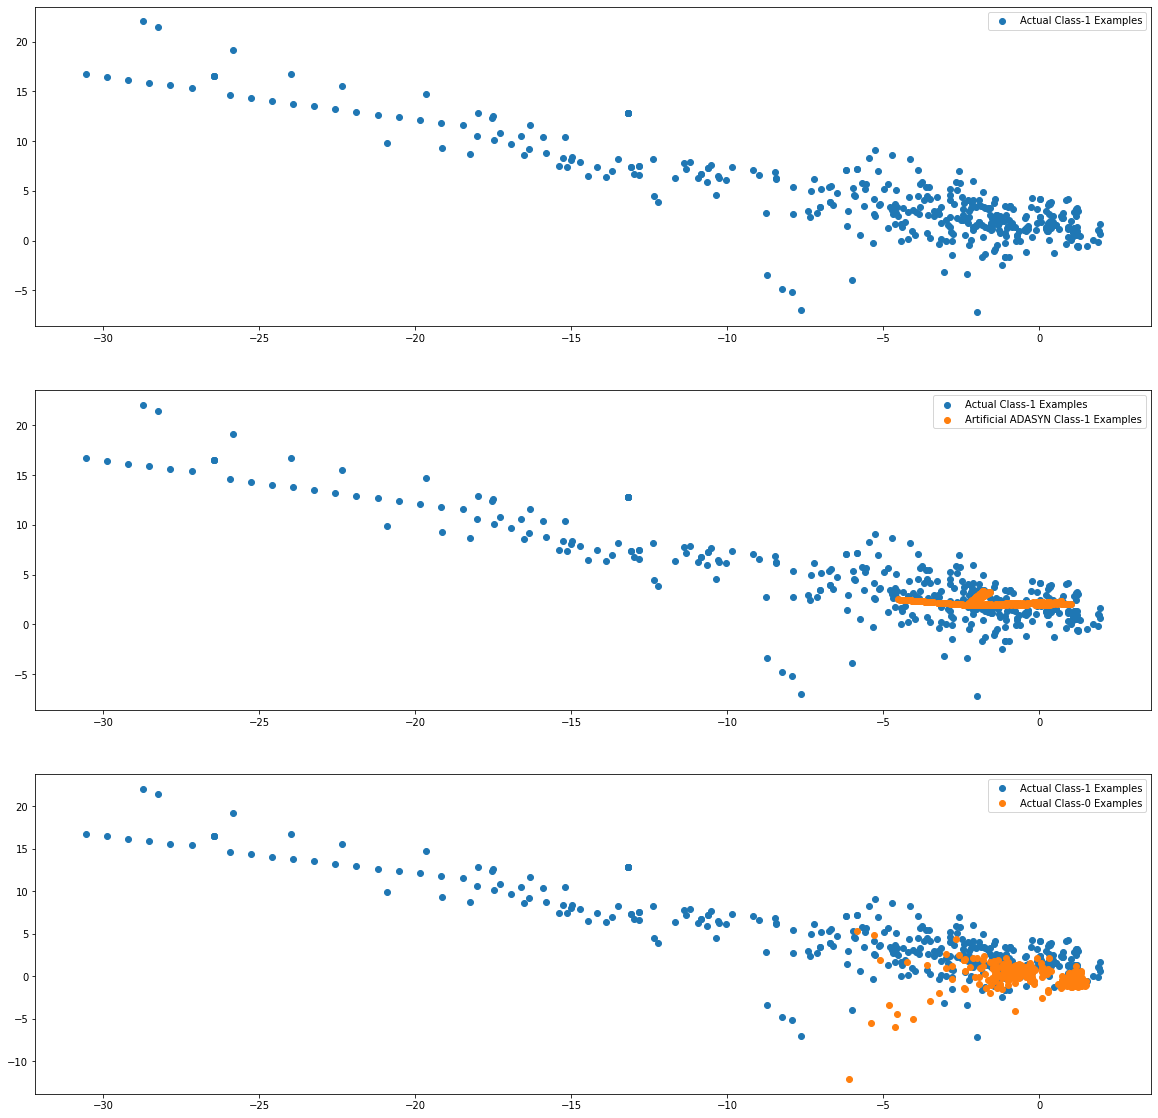

In [0]:
from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()



In [0]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

In [0]:
Data_Imbalance_Handling	 = "ADASYN Oversampling with StratifiedKFold CV "

#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
#start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
#start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9837840925609461
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.99536558  1.040472    0.86054532  0.95478253  0.78892654 -1.1802698
  -0.92251805 -0.58391691 -0.33968518 -0.90295945  0.80087087 -1.49823958
  -0.14145136 -1.97554486  0.13217482 -0.99877928 -1.125551   -0.50111868
   0.37693768 -1.40758233 -0.18341086  0.72687459  0.65838876 -1.08083968
   0.69686219  0.19660966  0.13556606  1.2859248   0.01275172  0.04680201]]
[-5.43870501]
{1: array([[0.61021517, 0.63159046, 0.72080484, 0.87495728, 0.96155685,
        0.97622443, 0.97996651, 0.98264108, 0.98380927, 0.98416981,
        0.98422199, 0.98422199, 0.98422199, 0.98422199, 0.98422199,
        0.98422199, 0.98422199, 0.98422199, 0.98422199, 0.98422199],
       [0.61045493, 0.63159708, 0.71938814, 0.87086492, 0.9587103 ,
        0.97444715, 0.97873341, 0.98183648, 0.98311067, 0.98346534,
        0.98351997, 0.98351997, 0.98351997, 0.98351997,

In [0]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998982,0.967170,0.003298
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998947,0.869484,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999070,0.869545,1.000000
5,Power Transformer,Random Forest,0.999350,0.930340,0.010000
6,Power Transformer,XGBoost,0.999315,0.975037,0.000756
7,Power Transformer,SVM,0.998560,0.891340,0.001346
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999034,0.997121,0.001853
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.949325,0.027425


## Results for ADASYN  Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


###### But looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

#Parameter Tuning for Final Model by Handling class imbalance

In [25]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

NameError: name 'X_over' is not defined

**As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [0]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9852138347557161
XGBoost threshold: 0.005087878089398146


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 12
3rd Top var = 4


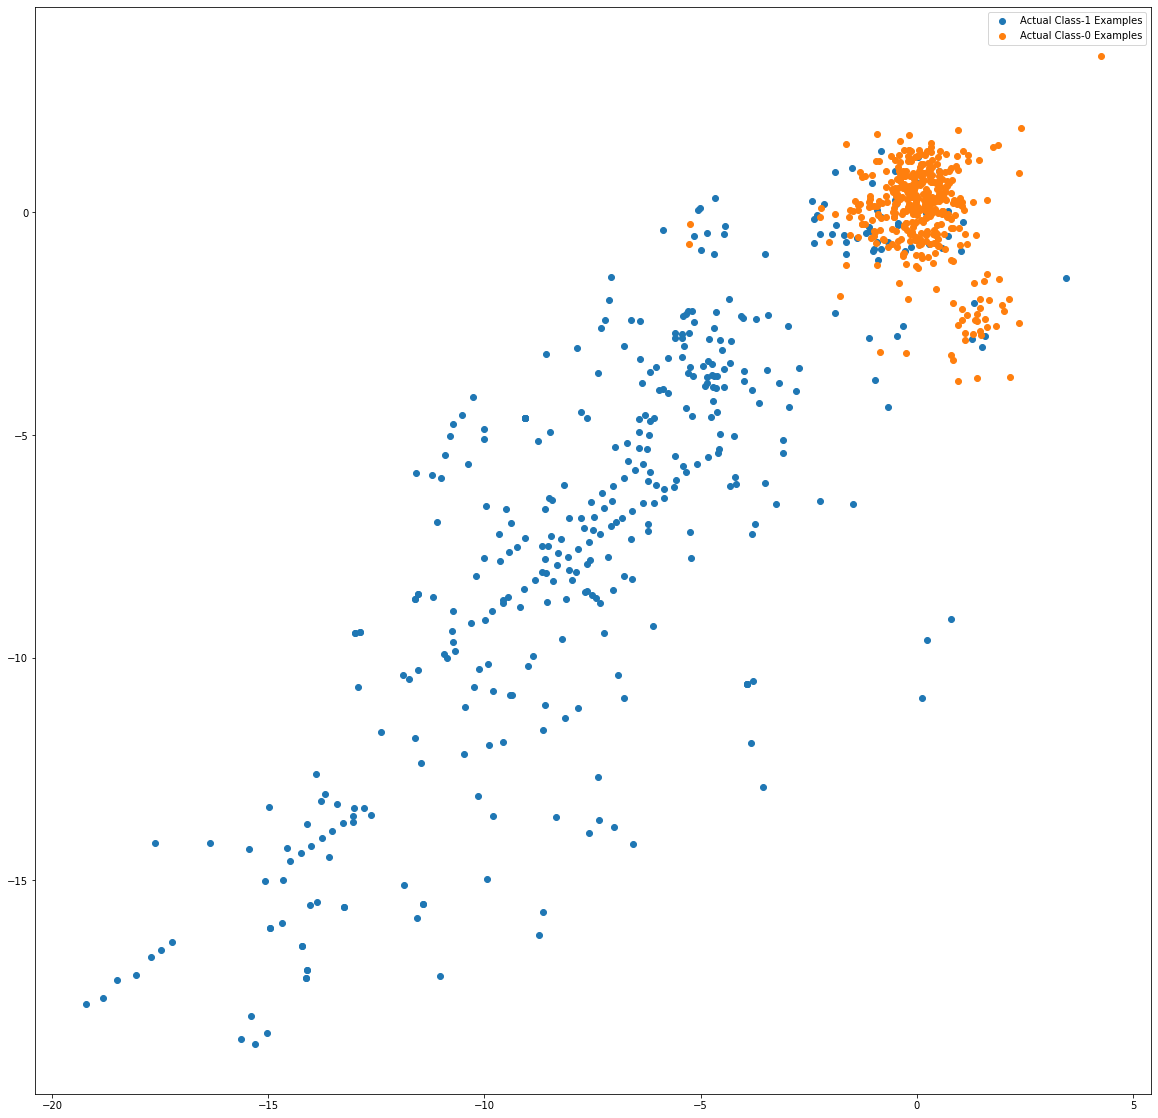

In [0]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [0]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [0]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

ERROR! Session/line number was not unique in database. History logging moved to new session 59
XGboost roc_value: 0.9852138347557161
XGBoost threshold: 0.005087878089398146


## Model Selection:
## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 


**Model Accuracy: 0.9993855444953564**

**XGboost roc_value: 0.9852138347557161**

**XGBoost threshold: 0.005087878089398146**

### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

